# EXercice 1 :  Classification d'Images de Chiens/chats avec un Réseau de Neurones Convolutif (CNN)
### Objectif
#### - Dans ce TP, vous allez :

1. Télécharger un dataset d'images de chiens directement depuis Internet.
2. Prétraitement des Images : Redimensionner les images, les normaliser, et préparer les données en lots.
3. Construire un modèle de réseau de neurones convolutif (CNN) en utilisant Keras.
3. Entraîner et évaluer le modèle sur les données de test.
4. Visualiser les performances du modèle à l'aide de courbes d'apprentissage.

## 1. Téléchargement et Préparation des Données
Nous allons utiliser un exemple de dataset tel que Dogs vs. Cats de Kaggle ou un autre dataset hébergé en ligne.
Le dataset cats_vs_dogs est téléchargé et divisé en trois ensembles : 70 % pour l'entraînement, 15 % pour la validation, et 15 % pour le test. Le dataset est chargé avec des images et des labels.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# 1. Chargement et Division des Données
# Charger le dataset cats_vs_dogs depuis TensorFlow Datasets
(ds_train, ds_dev, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.NQ2ZY9_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


### 2. Prétraitement des Images :

Les images sont redimensionnées en 128x128 pixels pour uniformiser la taille d'entrée.
Les pixels sont normalisés entre 0 et 1 en divisant par 255.
prefetch(tf.data.AUTOTUNE) est utilisé pour optimiser le chargement des données.

In [ ]:
# 2. Prétraitement des images (redimensionnement et normalisation)
def preprocess_image(image, label):
    # Redimensionner les images à 128x128 et normaliser les pixels entre 0 et 1
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Appliquer le prétraitement et créer des lots
batch_size = 32
ds_train = ds_train.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_dev = ds_dev.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

Valeurs min et max de l'image après normalisation: 0.0 1.0


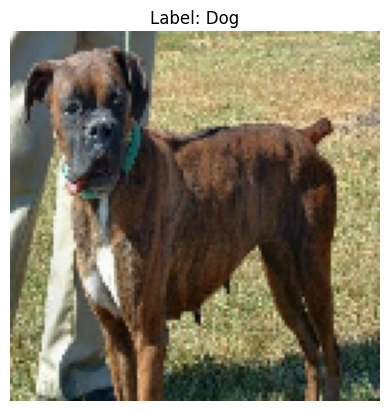

In [ ]:
import matplotlib.pyplot as plt
# Appliquer le prétraitement sur une seule image
for image, label in ds_train.take(1):  # Prendre une seule image du jeu d'entraînement
    image = image[0].numpy()  # Convertir en numpy pour l'affichage
    label = label[0].numpy()

# Vérification des valeurs minimum et maximum de l'image
print("Valeurs min et max de l'image après normalisation:", image.min(), image.max())

# Affichage de l'image
plt.imshow(image)
plt.title(f"Label: {'Dog' if label == 1 else 'Cat'}")  # Afficher le label en texte
plt.axis('off')
plt.show()

### 3. Création du Modèle CNN :

Le modèle utilise des couches Conv2D et MaxPooling2D pour extraire les caractéristiques.
La sortie est aplatie avec Flatten et passe à travers une couche dense avec une activation sigmoid pour la classification binaire (chat ou chien):


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:

# 3. Création de l'Architecture du Modèle CNN en Keras

model = tf.keras.Sequential([

    # Ajouter une couche de convolution 2D avec 32 filtres, taille de filtre 3x3, stride de (1, 1), padding 'same' et activation ReLU
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(128, 128, 3)),
    # Ajouter une couche de pooling max avec une taille de pool 2x2, stride de (2, 2), et padding 'same'
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    # Ajouter une seconde couche de convolution 2D avec 64 filtres, taille de filtre 3x3, stride de (1, 1), padding 'same' et activation ReLU
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    # Ajouter une seconde couche de pooling max avec une taille de pool 2x2, stride de (2, 2), et padding 'same'
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    # Ajouter une troisième couche de convolution 2D avec 128 filtres, taille de filtre 3x3, stride de (1, 1), padding 'same' et activation ReLU
    tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
     # Ajouter une troisième couche de pooling max avec une taille de pool 2x2, stride de (2, 2), et padding 'same'
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    # Ajouter une quatrième couche de convolution 2D avec 128 filtres, taille de filtre 3x3, stride de (1, 1), padding 'same' et activation ReLU
    tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    # Ajouter une quatrième couche de pooling max avec une taille de pool 2x2, stride de (2, 2), et padding 'same'
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    # Aplatir les caractéristiques extraites avant de passer aux couches entièrement connectées
    tf.keras.layers.Flatten(),


   # Ajouter une couche dense (entièrement connectée) avec 512 neurones et activation ReLU
    tf.keras.layers.Dense(512, activation='relu'),

    # Ajouter une couche de sortie dense avec 1 neurone et activation sigmoïde pour une sortie binaire (chat ou chien)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Affichage de l'architecture du modèle
model.summary()

# 4. Compilation du Modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,161 (16.92 MB)

 Trainable params: 4,436,161 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# 5. Entraînement du Modèle
history = model.fit(
    ds_train,
    validation_data=ds_dev,
    epochs=30
)

# 6. Évaluation sur les Données de Test
test_loss, test_acc = model.evaluate(ds_test)
print('\nTest accuracy:', test_acc)


Epoch 1/30


I0000 00:00:1730745566.211318     139 service.cc:145] XLA service 0x7c97c0003b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730745566.211376     139 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 13/509 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5263 - loss: 0.7420

I0000 00:00:1730745569.509288     139 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


509/509 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5336 - loss: 0.6904 - val_accuracy: 0.6819 - val_loss: 0.6187
Epoch 2/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7063 - loss: 0.5734 - val_accuracy: 0.7579 - val_loss: 0.5071
Epoch 3/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7754 - loss: 0.4699 - val_accuracy: 0.7917 - val_loss: 0.4372
Epoch 4/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8191 - loss: 0.3969 - val_accuracy: 0.8043 - val_loss: 0.4255
Epoch 5/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8524 - loss: 0.3337 - val_accuracy: 0.8120 - val_loss: 0.4261
Epoch 6/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8814 - loss: 0.2725 - val_accuracy: 0.8095 - val_loss: 0.4533
Epoch 7/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9116 - loss: 0.2141 - val_accuracy: 0.8089 - val_loss: 0.4782
Epoch 8/30
509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9320 - loss: 0.1700 - val_accurac

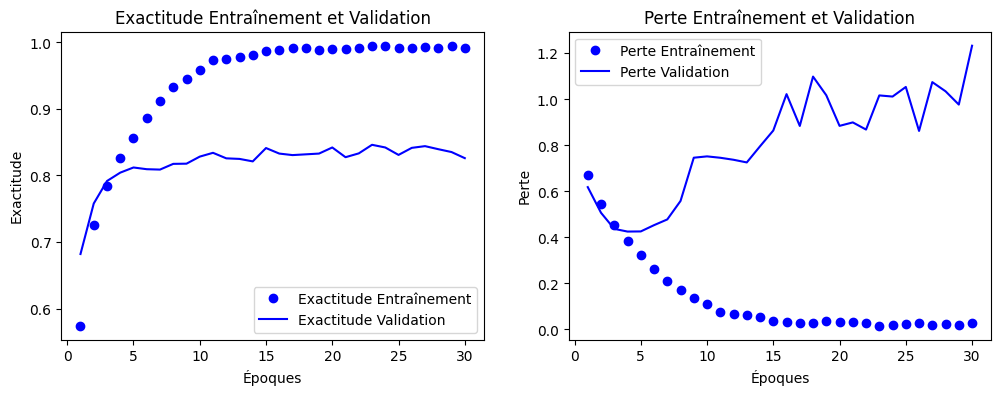

In [ ]:
# 7. Visualisation des Courbes d'Apprentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

# Courbe d'exactitude
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Exactitude Entraînement')
plt.plot(epochs, val_acc, 'b', label='Exactitude Validation')
plt.title('Exactitude Entraînement et Validation')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Perte Entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte Validation')
plt.title('Perte Entraînement et Validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()


# Questionnaire d’Interprétation des Résultats
## 1. Quel est le phénomène observé dans ces graphiques ?

* A) Sous-apprentissage (underfitting)
* B) Surapprentissage (overfitting)
* C) Modèle optimal
* Réponse attendue : B) Surapprentissage

## 2.Comment pouvez-vous identifier le surapprentissage dans ces graphiques ?

* A) L’exactitude d’entraînement et de validation augmentent toutes les deux de manière similaire.
* B) L’exactitude d’entraînement augmente, mais l’exactitude de validation stagne ou diminue.
* C) La perte d’entraînement diminue, tandis que la perte de validation  augmente.
*Réonse attendue :   B ) et C)

##3.À partir de quelle époque peut-on dire que le surapprentissage commence à apparaître ?

* A) Avant la 5ème époque
* B) Autour de la 10ème époque
* C) Après la 15ème époque
*Réonse attendue : B) Autour de la 10ème époque.

##4.Quelles techniques pouvez-vous appliquer pour atténuer le surapprentissage ?

* A) Ajouter de la régularisation (ex. : dropout, L2)
* B) Utiliser plus d’époques d’entraînement
* C) Réduire la complexité du modèle (par exemple, moins de couches ou de neurones)
* D) Utiliser des techniques d'augmentation de données
* Réponse attendue : A), C) et D)

## 5.Pourquoi l’exactitude d’entraînement continue-t-elle d’augmenter alors que celle de validation stagne ?

* A) Parce que le modèle commence à mémoriser les exemples d’entraînement
* B) Parce que le modèle est sous-entraîné
* C) Parce que le modèle est optimisé uniquement pour l’entraînement
* Réponse attendue : A) Parce que le modèle commence à mémoriser les exemples d’entraînement

##6. Quelle est la signification de la courbe de perte de validation qui augmente malgré une diminution de la perte d’entraînement ?

* A) Le modèle devient moins performant sur des données non vues, car il se spécialise sur les données d’entraînement.
* B) Le modèle est sous-entraîné et a besoin de plus d’époques pour apprendre.
* C) Le modèle généralise bien sur les données de validation.
* Réponse attendue : A) Le modèle devient moins performant sur des données non vues, car il se spécialise sur les données d’entraînement.

## 7. Quelle action devrait être entreprise si le surapprentissage persiste même après plusieurs ajustements ?

* A) Utiliser un modèle plus complexe
* B) Collecter plus de données pour l’entraînement
* C) Arrêter l'entraînement plus tôt (early stopping)
* Réponse attendue : B) et C)

# Exercice 2:
## La question 4: Quelles techniques pouvez-vous appliquer pour atténuer le surapprentissage ?

* A) Ajouter de la régularisation (ex. : dropout, L2)
* B) Utiliser plus d’époques d’entraînement
* C) Réduire la complexité du modèle (par exemple, moins de couches ou de neurones)
* D) Utiliser des techniques d'augmentation de données
* la Réponse attendue sont : A), C) et D)
### Ci-dessous nous appliquerons ces modifications (les réponses à la question quatre):
### 1. Augmentation de Données :
L'augmentation de données est appliquée uniquement aux données d’entraînement à l’aide de ImageDataGenerator. Elle permet de générer de nouvelles images à partir de variations des images d’origine (rotation, translation, zoom, etc.), ce qui aide le modèle à mieux généraliser.
Note : La syntaxe pour utiliser ImageDataGenerator avec tf.data.Dataset est ajustée ici pour intégrer l'augmentation de manière compatible.
### 2. Réduction de la Complexité du Modèle :
Le modèle contient moins de couches de convolution (3 au lieu de 4) pour réduire la complexité.
Le nombre de filtres a été réduit dans la couche dense finale, avec 256 neurones au lieu de 512.
### 3. Régularisation avec Dropout :
Des couches Dropout sont ajoutées après chaque bloc convolutionnel et avant la couche dense finale.
Dropout aide à éviter le surapprentissage en déconnectant aléatoirement un pourcentage des neurones pendant l’entraînement, obligeant ainsi le modèle à apprendre des caractéristiques plus généralisables.
### 4. Compilation et Entraînement :
Le modèle est compilé avec un learning rate de 0.0001 pour Adam.
L’entraînement est effectué avec une augmentation de données et une validation régulière pour évaluer la performance du modèle.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:

# 1. Chargement et Division des Données
(ds_train, ds_dev, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True
)

# 2. Prétraitement des images (redimensionnement et normalisation)
def preprocess_image(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Augmentation de Données - Appliquée uniquement aux données d'entraînement
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Préparation des lots d'entraînement avec augmentation de données
batch_size = 32
train_data_augmented = ds_train.map(preprocess_image)
train_data_augmented = train_data_augmented.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Apply data augmentation using tf.py_function, ensuring shape is preserved
def augment_data(images, labels):
    # Convert images to NumPy array within tf.py_function
    augmented_images = tf.py_function(lambda x: next(data_augmentation.flow(x.numpy(), batch_size=x.shape[0], shuffle=False)), [images], Tout=[tf.float32])[0]
    # Explicitly set the shape of augmented_images to match the original shape
    augmented_images.set_shape([None, 128, 128, 3]) # Set the shape explicitly
    return augmented_images, labels

train_data_augmented = train_data_augmented.map(augment_data, num_parallel_calls=tf.data.AUTOTUNE)


# Préparation des lots de validation et de test sans augmentation
ds_dev = ds_dev.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [ ]:
# 3. Création du Modèle CNN avec Régularisation et Réduction de Complexité
model = tf.keras.Sequential([
    # Couche Convolutive avec régularisation Dropout
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout pour régularisation

    # Réduire le nombre de couches convolutives
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Dropout pour régularisation

    # Réduction de la complexité avec moins de filtres
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),  # Dropout avec un taux plus élevé pour régularisation

    # Aplatir les sorties avant la couche dense
    tf.keras.layers.Flatten(),

    # Couche Dense avec moins de neurones et Dropout
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout pour éviter le surapprentissage
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sortie pour la classification binaire
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,482,369 (32.36 MB)

 Trainable params: 8,482,369 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 58s 101ms/step - accuracy: 0.5262 - loss: 0.6990 - val_accuracy: 0.6198 - val_loss: 0.6595
Epoch 2/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.6128 - loss: 0.6519 - val_accuracy: 0.6708 - val_loss: 0.6037
Epoch 3/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.6627 - loss: 0.6087 - val_accuracy: 0.6991 - val_loss: 0.5685
Epoch 4/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.6927 - loss: 0.5881 - val_accuracy: 0.7037 - val_loss: 0.5623
Epoch 5/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.6938 - loss: 0.5764 - val_accuracy: 0.7252 - val_loss: 0.5341
Epoch 6/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.7075 - loss: 0.5611 - val_accuracy: 0.7364 - val_loss: 0.5242
Epoch 7/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.7164 - loss: 0.5465 - val_accuracy: 0.7464 - val_loss: 0.5080
Epoch 8/100
509/509 ━━━━━━━━━━━━━━━━━━━━ 44s 85ms/step - accuracy: 0.7279 - loss: 

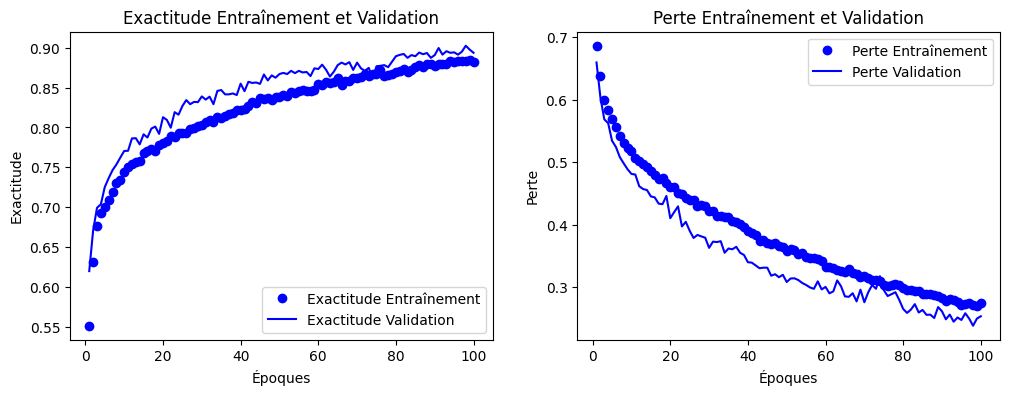

In [ ]:
# Affichage de l'architecture du modèle
model.summary()

# 4. Compilation du Modèle avec un Learning Rate Spécifique pour Adam
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Entraînement du Modèle avec Augmentation de Données
history = model.fit(
    train_data_augmented,
    validation_data=ds_dev,
    epochs=150
)

# 6. Évaluation sur les Données de Test
test_loss, test_acc = model.evaluate(ds_test)
print('\nTest accuracy:', test_acc)

# 7. Visualisation des Courbes d'Apprentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

# Courbe d'exactitude
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Exactitude Entraînement')
plt.plot(epochs, val_acc, 'b', label='Exactitude Validation')
plt.title('Exactitude Entraînement et Validation')
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Perte Entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte Validation')
plt.title('Perte Entraînement et Validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()


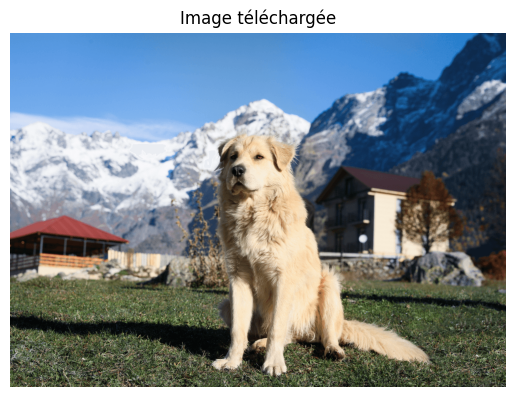

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
L'image est probablement un chien avec une probabilité de 91.82%


In [ ]:
# 1. Fonction pour télécharger l'image depuis une URL
def load_image_from_web(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# 2. Prétraiter l'image pour qu'elle soit compatible avec le modèle
def preprocess_image(img, target_size=(128, 128)):  # Assurez-vous que la taille correspond à celle du modèle
    img = img.resize(target_size)  # Redimensionner
    img = img.convert('RGB')  # Convertir en RGB si nécessaire
    img_array = np.array(img) / 255.0  # Normaliser les pixels entre 0 et 1
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
    return img_array

# 3. Tester le modèle avec l'image importée
def predict_image_from_web(url, model):
    # Charger et prétraiter l'image
    img = load_image_from_web(url)

    # Afficher l'image originale
    plt.imshow(img)
    plt.axis('off')  # Supprimer les axes pour une meilleure visualisation
    plt.title("Image téléchargée")
    plt.show()

    # Prétraiter l'image pour la prédiction
    img_array = preprocess_image(img)

    # Faire la prédiction
    prediction = model.predict(img_array)

    # Interpréter le résultat (exemple pour un modèle binaire : chat ou chien)
    if prediction[0] > 0.5:
        print(f"L'image est probablement un chien avec une probabilité de {prediction[0][0] * 100:.2f}%")
    else:
        print(f"L'image est probablement un chat avec une probabilité de {(1 - prediction[0][0]) * 100:.2f}%")


# Exemple d'utilisation :
# URL de l'image à tester
image_url = 'https://dogagingproject.org/_next/image?url=https%3A%2F%2Fcontent.dogagingproject.org%2Fwp-content%2Fuploads%2F2024%2F10%2F11.png&w=1200&q=75'  # Remplacez par l'URL de l'image
predict_image_from_web(image_url, model)

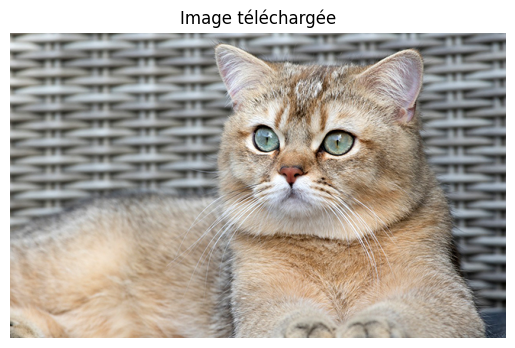

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
L'image est probablement un chat avec une probabilité de 98.82%


In [ ]:
# Exemple d'utilisation :
# URL de l'image à tester
image_url = 'https://lemagduchat.ouest-france.fr/images/dossiers/2022-07/pheromones-chat-060746.jpg'  # Remplacez par l'URL de l'image
predict_image_from_web(image_url, model)